Data Understanding and Preparation

Data Cleaning and Preprocessing: SBA Loan Dataset

This script performs:

Initial inspection

Target creation (Default)

Missing value handling

Type conversion (dates, categorical)

Saves the cleaned version for modeling

In [12]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'SBA.csv'
df = pd.read_csv(file_path)

# Step 2: Inspect the structure
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types summary:")
print(df.info())
print("Sample data:")
print(df.head(3))

# Step 3: Create binary target variable 'Default' from MIS_Status
if 'MIS_Status' in df.columns:
    # Confirm correct transformation: MIS_Status=0 → Defaulted (1), MIS_Status=1 → Paid (0)
    df['Default'] = df['MIS_Status'].apply(lambda x: 1 if x == 0 else 0)
    print("Target variable 'Default' created.")
    print(df['Default'].value_counts())
else:
    print("Column 'MIS_Status' not found.")

# Step 4: Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values:")
print(missing)

# Step 5: Drop columns with more than 30% missing values
threshold = len(df) * 0.3
columns_to_drop = missing[missing > threshold].index.tolist()
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)
    print("Dropped columns:", columns_to_drop)
else:
    print("No columns dropped for missing value threshold.")

# Step 6: Drop rows with any remaining missing values
df.dropna(inplace=True)
print("Data shape after dropping missing rows:", df.shape)

# Step 7: Convert 'date' columns to datetime
for col in df.columns:
    if 'date' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print("Converted column to datetime:", col)
        except:
            print("Could not convert column:", col)

# Step 8: Convert columns with ≤10 unique non-date values to category
for col in df.columns:
    if df[col].nunique() <= 10 and not pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].astype('category')
        print("Converted column to category:", col)

# Step 9: Final structure check
print("Final dataset info:")
print(df.info())

# Step 10: Save the cleaned dataset
output_path = 'SBA_cleaned.csv'
df.to_csv(output_path, index=False)
print("Cleaned file saved as:", output_path)


Dataset shape: (899164, 30)
Columns: ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DaysToDisbursement', 'Industry', 'Minority']
Data types summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   LoanNr_ChkDgt       899164 non-null  int64 
 1   Name                899164 non-null  int64 
 2   City                899164 non-null  int64 
 3   State               899164 non-null  int64 
 4   Zip                 899164 non-null  int64 
 5   Bank                899164 non-null  int64 
 6   BankState           899164 non-null  int64 
 

 – Data Preprocessing: Understand Feature Uniqueness (for encoding/drop decisions)

In [9]:
import pandas as pd

# Load your dataset
df = pd.read_csv("SBA_cleaned.csv")

# Calculate cardinality
cardinality = df.nunique().sort_values(ascending=False).reset_index()
cardinality.columns = ['Column', 'UniqueValues']

# Display the results
print("Cardinality (Number of unique values per column):")
print(cardinality)


Cardinality (Number of unique values per column):
                Column  UniqueValues
0        LoanNr_ChkDgt        899158
1                 Name        779578
2    DisbursementGross        118859
3         ChgOffPrinGr         83165
4             SBA_Appv         38326
5                  Zip         33611
6                 City         32581
7               GrAppv         22128
8         ApprovalDate          9859
9     DisbursementDate          8472
10          ChgOffDate          6448
11                Bank          5802
12  DaysToDisbursement          3673
13       FranchiseCode          2768
14               NAICS          1312
15               NoEmp           599
16                Term           412
17         RetainedJob           358
18           CreateJob           246
19           BankState            56
20          ApprovalFY            51
21               State            51
22            Industry            25
23           RevLineCr            18
24        BalanceGross   

Q1 – Exploratory Data Analysis (EDA)

In [158]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('SBA_cleaned.csv')

# Step 1: Convert low-cardinality columns (≤10 unique values and not datetime) to category
for col in df.columns:
    if df[col].nunique() <= 10 and not pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].astype('category')

# Step 2: Summary statistics for numeric columns
print("Summary statistics for numeric columns:")
print(df.describe(include=['int64', 'float64']))

# Step 3: Identify categorical columns after conversion
categorical_cols = df.select_dtypes(include='category').columns.tolist()
print("\nDetected categorical columns:")
print(categorical_cols)

# Step 4: Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
print(df[categorical_cols].describe())

# Step 5: Check for missing values
missing = df.isnull().sum()
print("\nMissing values (non-zero only):")
print(missing[missing > 0] if not missing.empty else "No missing values remaining.")


Summary statistics for numeric columns:
       LoanNr_ChkDgt           Name           City          State  \
count   8.991580e+05  899158.000000  899158.000000  899158.000000   
mean    4.772637e+09  390689.028438   15661.906818      23.766419   
std     2.538165e+09  225038.616703    9254.869403      15.121022   
min     1.000093e+09       0.000000       0.000000       0.000000   
25%     2.589817e+09  195134.250000    7466.000000       9.000000   
50%     4.361460e+09  391870.000000   15659.000000      23.000000   
75%     6.904649e+09  585579.750000   23830.000000      37.000000   
max     9.996003e+09  779582.000000   32580.000000      50.000000   

                 Zip           Bank      BankState          NAICS  \
count  899158.000000  899158.000000  899158.000000  899158.000000   
mean    53804.467216    2871.843236      28.118179  398661.244315   
std     31184.205065    1887.398856      15.778652  263318.179117   
min         0.000000       0.000000       0.000000       0.000

Q1 – Visual EDA: Loan Defaults & Business Characteristics

Loaded cleaned dataset with shape: (899158, 31)


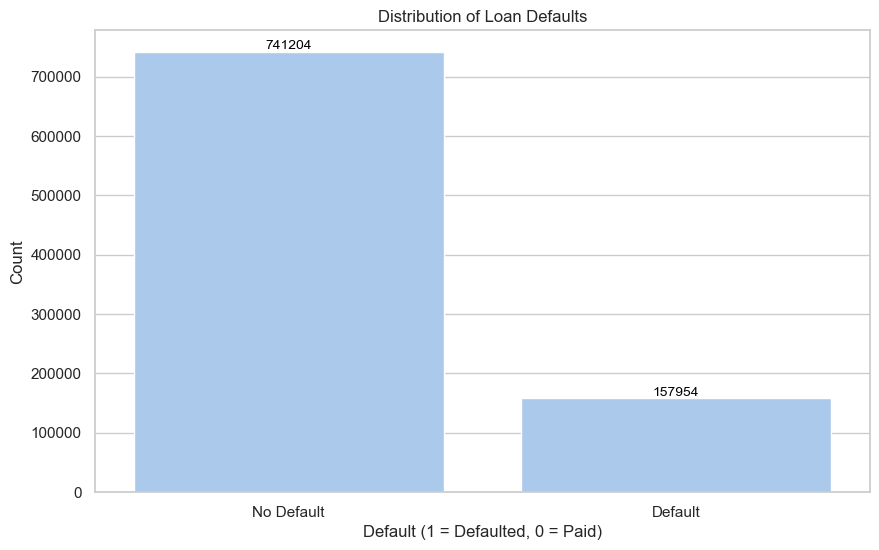

Default Rate: 17.57%


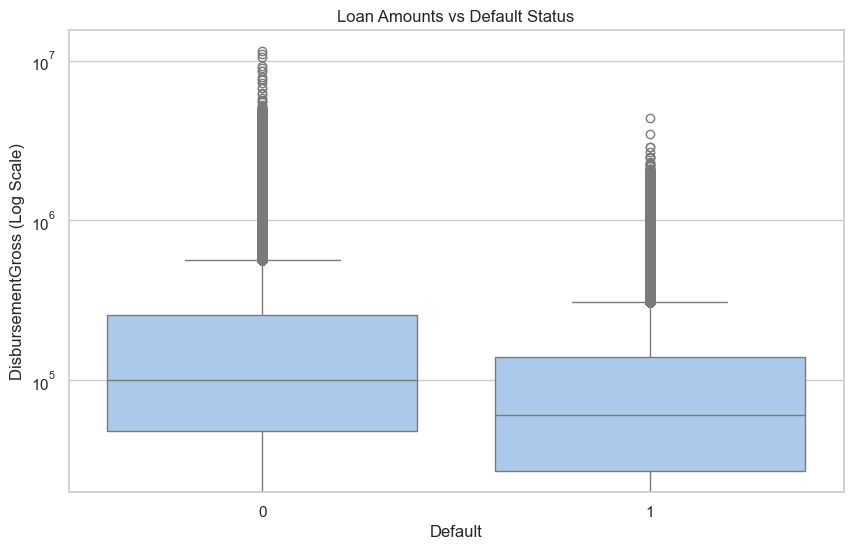

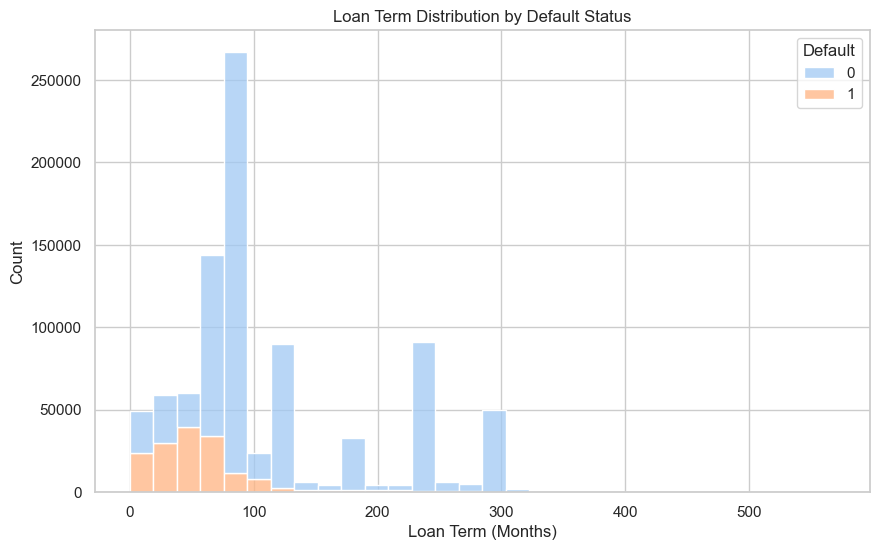

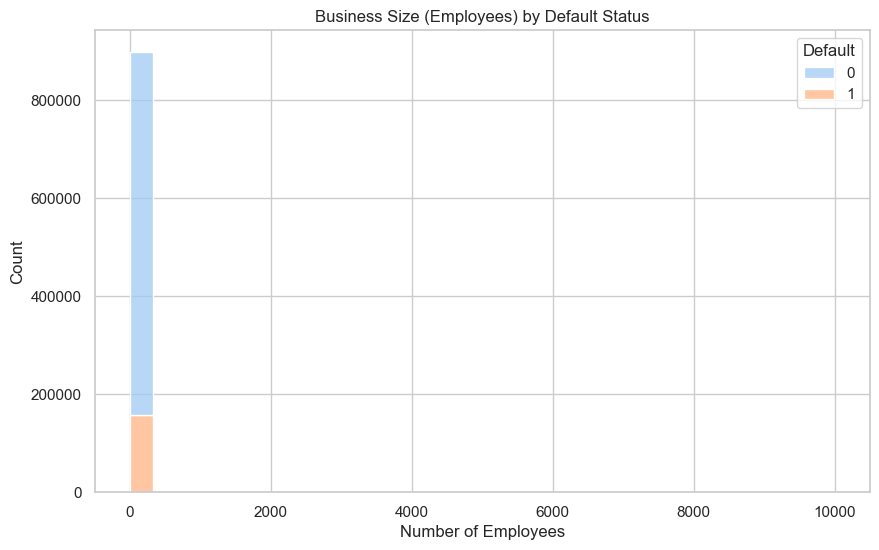

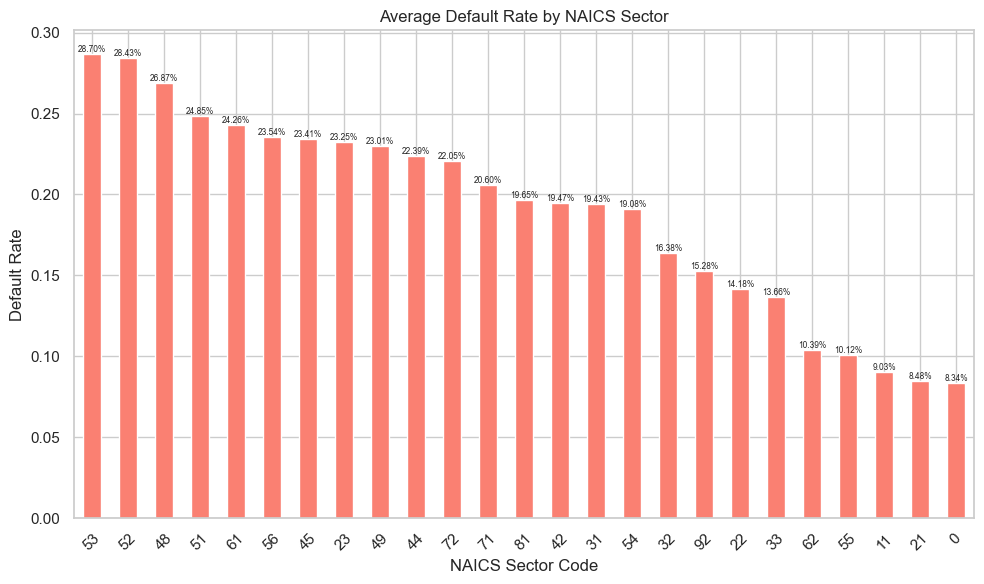

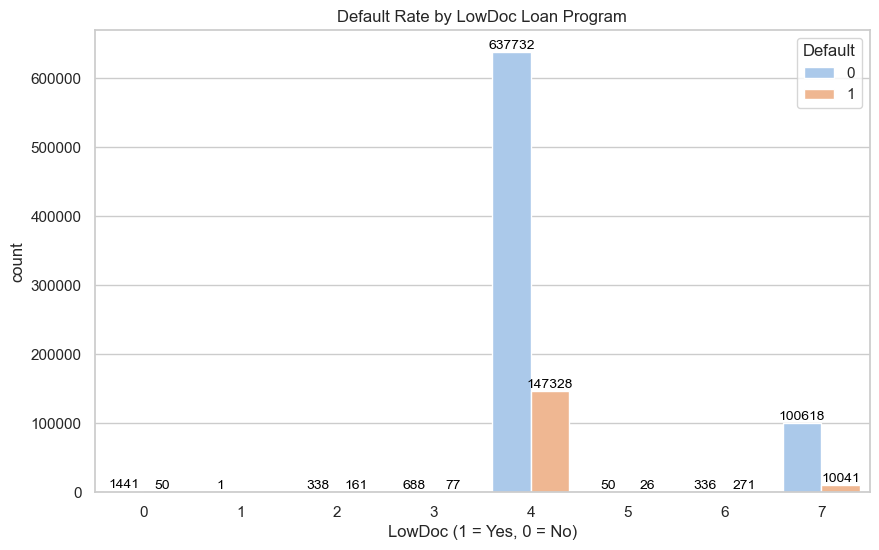

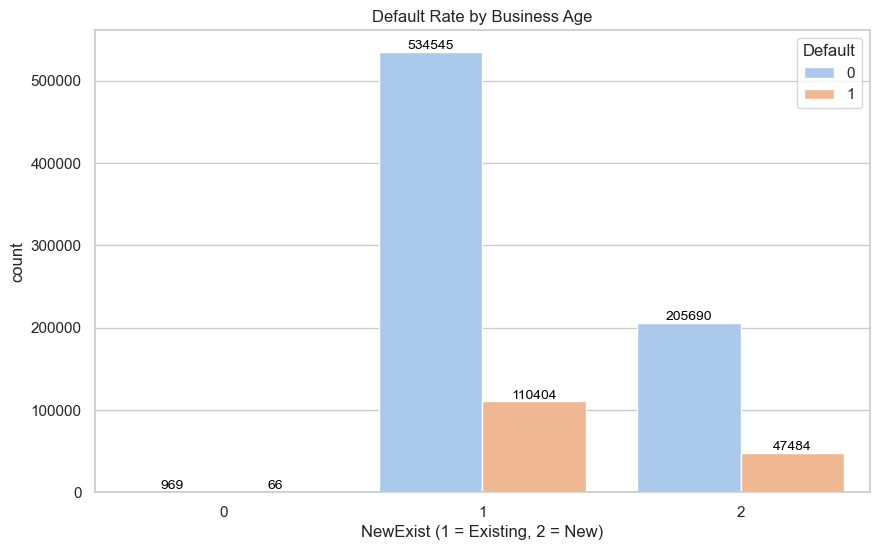

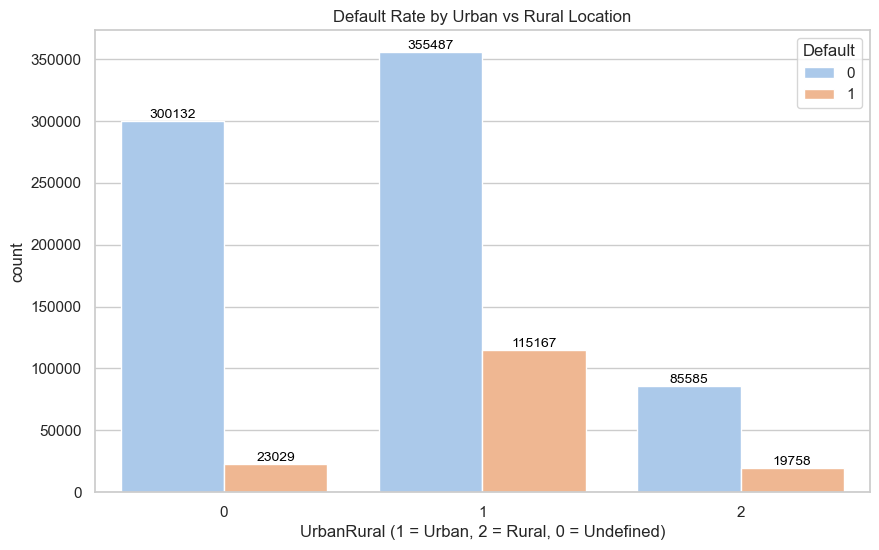

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'SBA_cleaned.csv'
df = pd.read_csv(file_path)
print("Loaded cleaned dataset with shape:", df.shape)

# Set plot styles
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (10, 6)

# Helper function to annotate bars
def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=10, color='black')

# -------------------------------------------
# 1. Target Variable Distribution: Default
# -------------------------------------------
ax = sns.countplot(x='Default', data=df)
plt.title('Distribution of Loan Defaults')
plt.xlabel('Default (1 = Defaulted, 0 = Paid)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Default', 'Default'])
annotate_bars(ax)
plt.show()

# Default rate
default_rate = df['Default'].mean() * 100
print(f"Default Rate: {default_rate:.2f}%")

# -------------------------------------------
# 2. Loan Amounts vs Default Status
# -------------------------------------------
sns.boxplot(x='Default', y='DisbursementGross', data=df)
plt.yscale('log')  # Log scale to handle outliers
plt.title('Loan Amounts vs Default Status')
plt.xlabel('Default')
plt.ylabel('DisbursementGross (Log Scale)')
plt.show()

# -------------------------------------------
# 3. Loan Term Distribution by Default
# -------------------------------------------
sns.histplot(data=df, x='Term', hue='Default', multiple='stack', bins=30)
plt.title('Loan Term Distribution by Default Status')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Count')
plt.show()

# -------------------------------------------
# 4. Number of Employees vs Default
# -------------------------------------------
sns.histplot(data=df, x='NoEmp', hue='Default', multiple='stack', bins=30)
plt.title('Business Size (Employees) by Default Status')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.show()

# -------------------------------------------
# 5. Default Rate by NAICS Sector
# -------------------------------------------
if 'NAICS_Sector' not in df.columns:
    df['NAICS_Sector'] = df['NAICS'].astype(str).str[:2]

naics_default = df.groupby('NAICS_Sector')['Default'].mean().sort_values(ascending=False)
ax = naics_default.plot(kind='bar', color='salmon')
plt.title('Average Default Rate by NAICS Sector')
plt.ylabel('Default Rate')
plt.xlabel('NAICS Sector Code')
plt.xticks(rotation=45)

# Annotate bar values as percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=6)
plt.tight_layout()
plt.show()

# -------------------------------------------
# 6. Categorical Feature Comparisons
# -------------------------------------------

# LowDoc Program
ax = sns.countplot(x='LowDoc', hue='Default', data=df)
plt.title('Default Rate by LowDoc Loan Program')
plt.xlabel('LowDoc (1 = Yes, 0 = No)')
annotate_bars(ax)
plt.show()

# New vs Existing Business
ax = sns.countplot(x='NewExist', hue='Default', data=df)
plt.title('Default Rate by Business Age')
plt.xlabel('NewExist (1 = Existing, 2 = New)')
annotate_bars(ax)
plt.show()

# Urban vs Rural
ax = sns.countplot(x='UrbanRural', hue='Default', data=df)
plt.title('Default Rate by Urban vs Rural Location')
plt.xlabel('UrbanRural (1 = Urban, 2 = Rural, 0 = Undefined)')
annotate_bars(ax)
plt.show()  

Q1 – EDA: Focused Heatmap of Predictive Variables

Dataset loaded. Shape: (899158, 31)


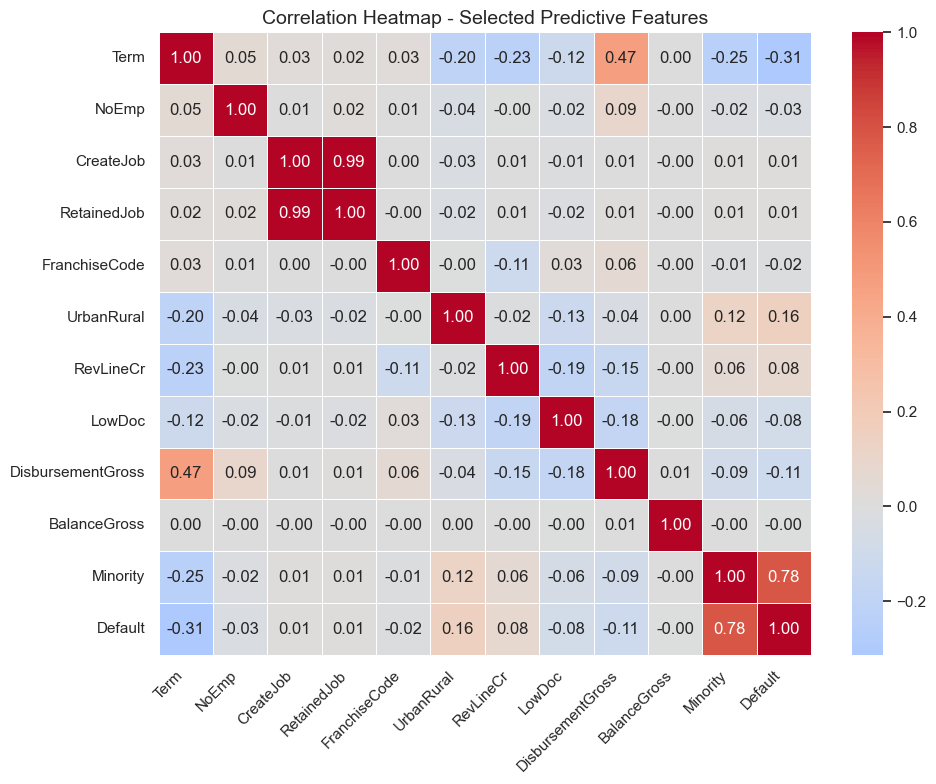

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned SBA dataset
df = pd.read_csv('SBA_cleaned.csv')
print(f"Dataset loaded. Shape: {df.shape}")

# Ensure 'Default' is numeric (if stored as category)
if df['Default'].dtype.name == 'category':
    df['Default'] = df['Default'].astype(int)

# Step 1: Define selected predictive features
selected_features = [
    'Term',             # Loan term
    'NoEmp',            # Number of employees
    'CreateJob',        # Jobs to be created
    'RetainedJob',      # Jobs to be retained
    'FranchiseCode',    # Franchise indicator
    'UrbanRural',       # Business location
    'RevLineCr',        # Revolving credit line (Y/N)
    'LowDoc',           # LowDoc loan (Y/N)
    'DisbursementGross',# Amount disbursed
    'BalanceGross',     # Outstanding balance
    'Minority',         # Minority-owned business
    'Default'           # Target variable
]

# Filter dataset to include only selected features
# (Ignore features that may have been dropped during cleaning)
available_features = [col for col in selected_features if col in df.columns]
df_subset = df[available_features]

# Convert LowDoc and RevLineCr if they're not numeric yet
for col in ['LowDoc', 'RevLineCr']:
    if df_subset[col].dtype.name == 'object':
        df_subset[col] = df_subset[col].map({'Y': 1, 'N': 0})

# Step 2: Compute correlation matrix
corr_matrix = df_subset.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, center=0)
plt.title("Correlation Heatmap - Selected Predictive Features", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Q2(a) – Fit a logistic regression model on the full dataset. Evaluate performance across multiple probability thresholds.

This code:

Drops irrelevant/leaky columns

Encodes categorical variables

Trains a logistic regression model

Evaluates it across multiple thresholds (10%, 20%, 35%, 50%)

Computes & visualizes TPR/FPR and ROC curve

Identifies the optimal threshold using Youden's J statistic

Step 1: Loading the dataset
Dataset loaded. Shape: (899158, 31)
Dataset columns: ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DaysToDisbursement', 'Industry', 'Minority', 'Default']

Step 2: Converting 'Default' column to numeric
Unique values in 'Default':
[1 0]

Step 3: Selecting features by dropping identifiers and date columns
Feature matrix X shape: (899158, 19)

Step 4: Applying one-hot encoding to categorical features
Shape of X after encoding: (899158, 19)

Step 5: Target variable y set. Distribution (in %):
         Percentage
Default            
0         82.433121
1         17.566879

Step 6: Scaling the feature data
First five rows of scaled features:
      NAICS  ApprovalFY     

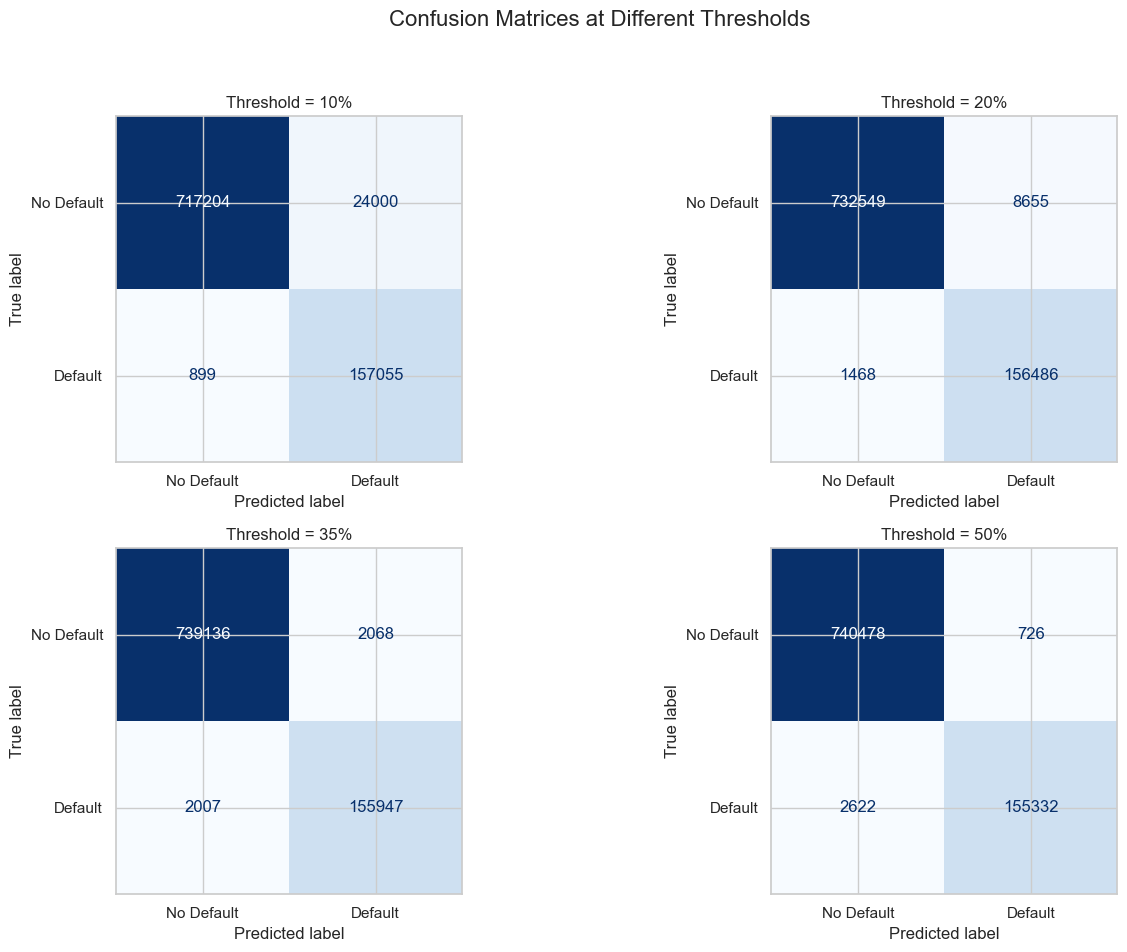


Step 11: Computing ROC curve metrics
First 10 ROC curve entries:
   Threshold  False Positive Rate  True Positive Rate
0        inf             0.000000            0.000000
1        1.0             0.000050            0.193430
2        1.0             0.000050            0.201185
3        1.0             0.000050            0.204363
4        1.0             0.000053            0.206402
5        1.0             0.000053            0.207959
6        1.0             0.000053            0.209181
7        1.0             0.000053            0.210150
8        1.0             0.000053            0.211150
9        1.0             0.000053            0.211979

Step 12: Computing ROC metrics and plotting

Optimal threshold based on Youden's J statistic: 0.3610


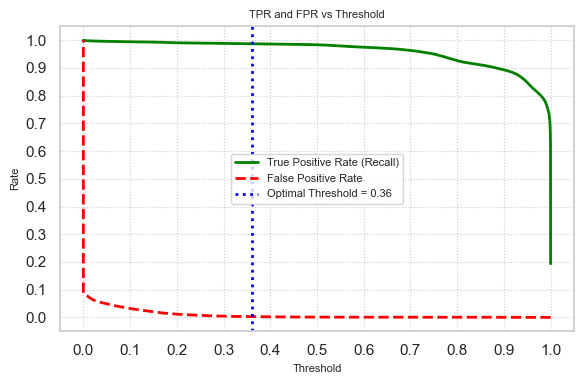

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import StandardScaler

# Step 1: Load the cleaned dataset and display basic information
print("Step 1: Loading the dataset")
df = pd.read_csv("SBA_cleaned.csv")
print("Dataset loaded. Shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

# Step 2: Convert the target column 'Default' to numeric (binary)
print("\nStep 2: Converting 'Default' column to numeric")
df['Default'] = df['Default'].astype(int)
print("Unique values in 'Default':")
print(df['Default'].unique())

# Step 3: Select features for the model by dropping identifiers and date columns
print("\nStep 3: Selecting features by dropping identifiers and date columns")
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status']
X = df.drop(columns=drop_cols + ['Default'], errors='ignore')
print("Feature matrix X shape:", X.shape)

# Step 4: One-hot encode categorical features in X
print("\nStep 4: Applying one-hot encoding to categorical features")
X = pd.get_dummies(X, drop_first=True)
print("Shape of X after encoding:", X.shape)

# Step 5: Set the target variable and display its distribution as a table
y = df['Default']
print("\nStep 5: Target variable y set. Distribution (in %):")
dist_df = pd.DataFrame(y.value_counts(normalize=True) * 100)
dist_df.columns = ["Percentage"]
print(dist_df)

# Step 6: Scale the feature data using StandardScaler
print("\nStep 6: Scaling the feature data")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First five rows of scaled features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# Step 7: Fit the logistic regression model with increased max_iter for convergence
print("\nStep 7: Fitting the logistic regression model")
model = LogisticRegression(max_iter=2000)
model.fit(X_scaled, y)
print("Model fitted successfully.")
print("Model coefficients (first five):")
print(model.coef_[0][:5])
print("Model intercept:")
print(model.intercept_)

# Step 8: Predict probabilities for the positive class (Default = 1)
print("\nStep 8: Predicting probabilities")
probs = model.predict_proba(X_scaled)[:, 1]
print("First 10 predicted probabilities:")
print(probs[:10])

# Step 9: Evaluate the model at various thresholds and display confusion matrices as tables
print("\nStep 9: Evaluating the model at different thresholds")
thresholds = [0.10, 0.20, 0.35, 0.50]
conf_matrices = {}
results_list = []  # to store TPR and FPR values for each threshold

for t in thresholds:
    preds = (probs >= t).astype(int)
    cm = confusion_matrix(y, preds)
    conf_matrices[t] = cm
    # Unpack confusion matrix values
    TN, FP, FN, TP = cm.ravel()
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0  # Recall
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    results_list.append({'Threshold': t, 'TPR': TPR, 'FPR': FPR})
    print(f"\nConfusion Matrix at threshold {int(t * 100)}%:")
    cm_df = pd.DataFrame(cm,
                         index=["Actual: No Default", "Actual: Default"],
                         columns=["Predicted: No Default", "Predicted: Default"])
    print(cm_df)
    print(f"TPR (Recall): {TPR:.4f}")
    print(f"FPR: {FPR:.4f}")
    results_list.append({'Threshold': t, 'TPR': TPR, 'FPR': FPR})

results_df = pd.DataFrame(results_list)
print("\nSummary of TPR and FPR at different thresholds:")
print(results_df)

# Step 10: Plot confusion matrices for each threshold
print("\nStep 10: Plotting confusion matrices for each threshold")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, t in enumerate(thresholds):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[t],
                                  display_labels=["No Default", "Default"])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Threshold = {int(t * 100)}%")
plt.suptitle("Confusion Matrices at Different Thresholds", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Step 11: Compute ROC curve metrics and display as a table
print("\nStep 11: Computing ROC curve metrics")
fpr, tpr, roc_thresholds = roc_curve(y, probs)
roc_df = pd.DataFrame({
    "Threshold": roc_thresholds,
    "False Positive Rate": fpr,
    "True Positive Rate": tpr
})
print("First 10 ROC curve entries:")
print(roc_df.head(10))

# Step 12: ROC Curve
print("\nStep 12: Computing ROC metrics and plotting")
fpr, tpr, roc_thresholds = roc_curve(y, probs)
youden_j = tpr - fpr
best_idx = np.argmax(youden_j)
best_threshold = roc_thresholds[best_idx]
print(f"\nOptimal threshold based on Youden's J statistic: {best_threshold:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(roc_thresholds, tpr, label='True Positive Rate (Recall)', color='green', linewidth=2)
plt.plot(roc_thresholds, fpr, label='False Positive Rate', color='red', linestyle='--', linewidth=2)
plt.axvline(x=best_threshold, color='blue', linestyle=':', linewidth=2, label=f'Optimal Threshold = {best_threshold:.2f}')
plt.title('TPR and FPR vs Threshold', fontsize=8)
plt.xlabel('Threshold', fontsize=8)
plt.ylabel('Rate', fontsize=8)
plt.xticks(np.arange(0, 1.05, 0.1))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.legend(loc='center', fontsize=8)
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()


Q2(b) – Train/test split, threshold comparison, and model validation using cross-validation

This code:

Splits the dataset into 70% training and 30% testing

Trains a logistic regression model

Evaluates model at multiple thresholds (10%, 20%, 35%, 50%) on test set

Calculates and plots accuracy, precision, recall, confusion matrices

Performs 5-fold cross-validation to validate generalization performance

Step 1: Loading the dataset
Dataset loaded. Shape: (899158, 31)
Dataset columns: ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DaysToDisbursement', 'Industry', 'Minority', 'Default']

Step 2: Converting 'Default' column to numeric
Unique values in 'Default':
[1 0]

Step 3: Selecting features by dropping identifiers and date columns
Feature matrix X shape: (899158, 19)

Step 4: Applying one-hot encoding to categorical features
Shape of X after encoding: (899158, 19)

Step 5: Target variable distribution (in %):
         Percentage
Default            
0         82.433121
1         17.566879

Step 6: Scaling the feature data
First five rows of scaled features:
      NAICS  ApprovalFY      Term  

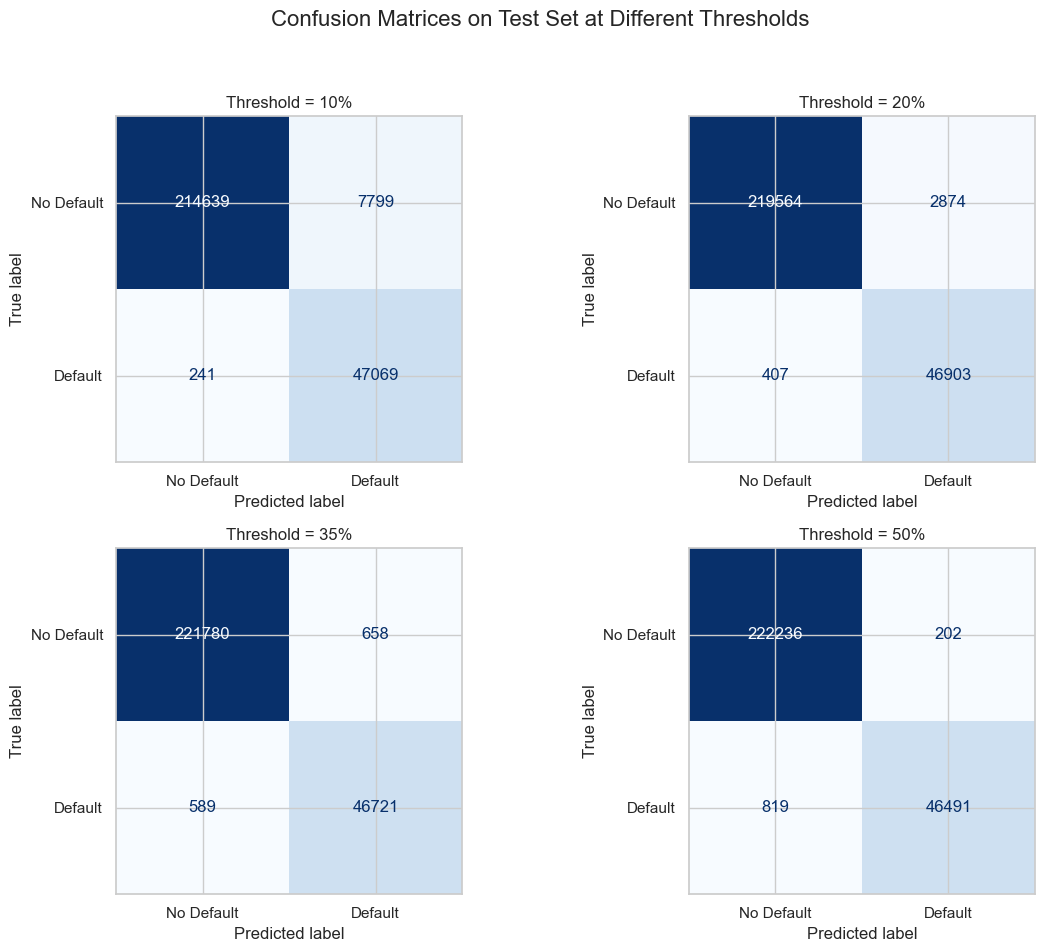


Step 11: 5-Fold Cross-Validation on Training Set
Cross-validation results (5-fold):
   test_accuracy  test_precision  test_recall
0       0.995853        0.994915     0.981426
1       0.995837        0.994643     0.981608
2       0.996123        0.994878     0.983009
3       0.996044        0.995193     0.982240
4       0.995996        0.994331     0.982828

Average performance on training set:
Accuracy: 0.9959708298247566
Precision: 0.994791699322773
Recall: 0.9822222551967761

Optimal Threshold based on Youden's J statistic: 0.3879


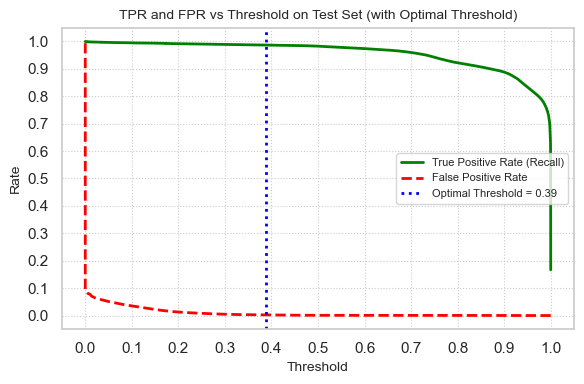

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Data Preparation
# -------------------------------

# Step 1: Load the cleaned dataset and display basic information
print("Step 1: Loading the dataset")
df = pd.read_csv("SBA_cleaned.csv")
print("Dataset loaded. Shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

# Step 2: Convert the target column 'Default' to numeric (binary)
print("\nStep 2: Converting 'Default' column to numeric")
df['Default'] = df['Default'].astype(int)
print("Unique values in 'Default':")
print(df['Default'].unique())

# Step 3: Select features for the model by dropping identifiers and date columns
print("\nStep 3: Selecting features by dropping identifiers and date columns")
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status']
X = df.drop(columns=drop_cols + ['Default'], errors='ignore')
print("Feature matrix X shape:", X.shape)

# Step 4: One-hot encode categorical features in X
print("\nStep 4: Applying one-hot encoding to categorical features")
X = pd.get_dummies(X, drop_first=True)
print("Shape of X after encoding:", X.shape)

# Step 5: Set the target variable and display its distribution as a table
y = df['Default']
print("\nStep 5: Target variable distribution (in %):")
dist_df = pd.DataFrame(y.value_counts(normalize=True) * 100)
dist_df.columns = ["Percentage"]
print(dist_df)

# Step 6: Scale the feature data using StandardScaler
print("\nStep 6: Scaling the feature data")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First five rows of scaled features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# -------------------------------
# Train-Test Split and Model Fitting
# -------------------------------

# Step 7: Split data into training (70%) and test (30%) sets
print("\nStep 7: Splitting data into training and test sets (70% / 30%)")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
print("Training set shape:", X_train.shape, "Test set shape:", X_test.shape)

# Step 8: Fit logistic regression model on the training set
print("\nStep 8: Fitting the logistic regression model on the training set")
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
print("Model fitted successfully.")
print("Model coefficients (first five):")
print(model.coef_[0][:5])
print("Model intercept:")
print(model.intercept_)

# -------------------------------
# Threshold Analysis on Test Set
# -------------------------------

# Step 9: Predict probabilities on the test set (for Default = 1)
print("\nStep 9: Predicting probabilities on the test set")
probs_test = model.predict_proba(X_test)[:, 1]
print("First 10 predicted probabilities on test set:")
print(probs_test[:10])

# Define probability thresholds
thresholds = [0.10, 0.20, 0.35, 0.50]
conf_matrices = {}
metrics_list = []

print("\nEvaluating model at various thresholds on the test set:")
for t in thresholds:
    preds = (probs_test >= t).astype(int)
    cm = confusion_matrix(y_test, preds)
    conf_matrices[t] = cm
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    metrics_list.append({'Threshold': t, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
    print(f"\nConfusion Matrix at threshold {int(t*100)}%:")
    cm_df = pd.DataFrame(cm,
                         index=["Actual: No Default", "Actual: Default"],
                         columns=["Predicted: No Default", "Predicted: Default"])
    print(cm_df)
    print(f"Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall (TPR): {recall:.4f}")

metrics_df = pd.DataFrame(metrics_list)
print("\nSummary of performance metrics on test set at different thresholds:")
print(metrics_df)

# -------------------------------
# Plot Confusion Matrices for Test Set
# -------------------------------

print("\nStep 10: Plotting confusion matrices for each threshold on the test set")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, t in enumerate(thresholds):
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrices[t],
                                  display_labels=["No Default", "Default"])
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Threshold = {int(t * 100)}%")
plt.suptitle("Confusion Matrices on Test Set at Different Thresholds", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -------------------------------
# 5-Fold Cross-Validation on Training Set
# -------------------------------

print("\nStep 11: 5-Fold Cross-Validation on Training Set")
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall'
}

cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
cv_results_df = pd.DataFrame(cv_results)
print("Cross-validation results (5-fold):")
print(cv_results_df[['test_accuracy', 'test_precision', 'test_recall']])
print("\nAverage performance on training set:")
print("Accuracy:", np.mean(cv_results['test_accuracy']))
print("Precision:", np.mean(cv_results['test_precision']))
print("Recall:", np.mean(cv_results['test_recall']))

# -------------------------------
# Optional: Plot TPR and FPR vs Threshold for Test Set
# -------------------------------

from sklearn.metrics import roc_curve


# Step 1: Compute ROC curve values from test data
fpr, tpr, roc_thresholds = roc_curve(y_test, probs_test)

# Step 2: Compute Youden’s J statistic (tpr - fpr)
youden_j = tpr - fpr
best_index = np.argmax(youden_j)
best_threshold = roc_thresholds[best_index]
print(f"\nOptimal Threshold based on Youden's J statistic: {best_threshold:.4f}")

# Step 3: Plot TPR and FPR vs threshold with optimal line
plt.figure(figsize=(6, 4))
plt.plot(roc_thresholds, tpr, label='True Positive Rate (Recall)', color='green', linewidth=2)
plt.plot(roc_thresholds, fpr, label='False Positive Rate', color='red', linestyle='--', linewidth=2)

# Optimal threshold vertical line
plt.axvline(x=best_threshold, color='blue', linestyle=':', linewidth=2, label=f'Optimal Threshold = {best_threshold:.2f}')

plt.title('TPR and FPR vs Threshold on Test Set (with Optimal Threshold)', fontsize=10)
plt.xlabel('Threshold', fontsize=10)
plt.ylabel('Rate', fontsize=10)
plt.xticks(np.arange(0, 1.05, 0.1))
plt.yticks(np.arange(0, 1.05, 0.1))
plt.legend(loc='center right', fontsize=8)
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()



Q2(c) – Plot ROC, compute AUC, and interpret model performance

This code:

Plots the ROC curve and calculates the AUC (Area Under the Curve)

Plots the Precision-Recall curve and calculates Average Precision

Helps evaluate model effectiveness, especially with imbalanced classes

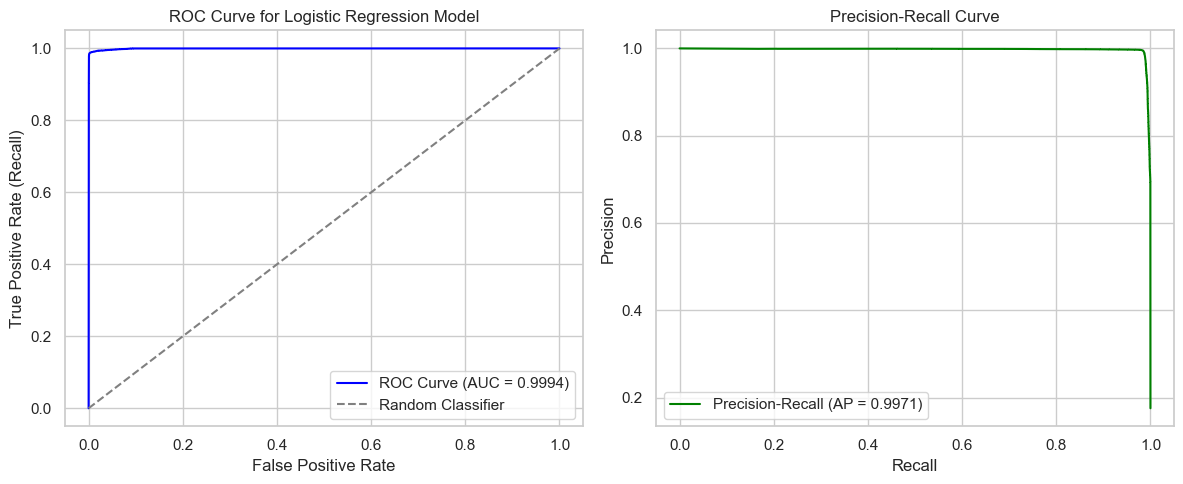

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming you already have y_test (true labels) and probs_test (predicted probabilities for class 1)

# --- ROC Curve ---
fpr, tpr, roc_thresholds = roc_curve(y_test, probs_test)
auc_score = roc_auc_score(y_test, probs_test)

plt.figure(figsize=(12, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.grid(True)

# --- Precision-Recall Curve ---
precision, recall, pr_thresholds = precision_recall_curve(y_test, probs_test)
avg_precision = average_precision_score(y_test, probs_test)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"Precision-Recall (AP = {avg_precision:.4f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Q3(a, b): Comparative Supervised Model Evaluation – Logistic Regression, Decision Tree, Random Forest, KNN
This code:

Prepares the data and scales features

Trains four supervised models on the same training/test split:

Logistic Regression

Decision Tree

Random Forest

K-Nearest Neighbors

Computes AUC and confusion matrices for each model

Visualizes ROC curves and confusion matrices

Helps you compare performance and choose the best model based on AUC and interpretability

Step 1: Loading the dataset
Dataset loaded. Shape: (899158, 31)
Dataset columns: ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'DaysToDisbursement', 'Industry', 'Minority', 'Default']

Step 2: Converting 'Default' column to numeric
Unique values in 'Default': [1 0]

Step 3: Selecting features by dropping identifiers and date columns
Feature matrix X shape: (899158, 19)

Step 4: Applying one-hot encoding to categorical features
Shape of X after encoding: (899158, 19)

Step 5: Target variable distribution (in %):
         Percentage
Default            
0         82.433121
1         17.566879

Step 6: Scaling the feature data
First five rows of scaled features:
      NAICS  ApprovalFY      Term  

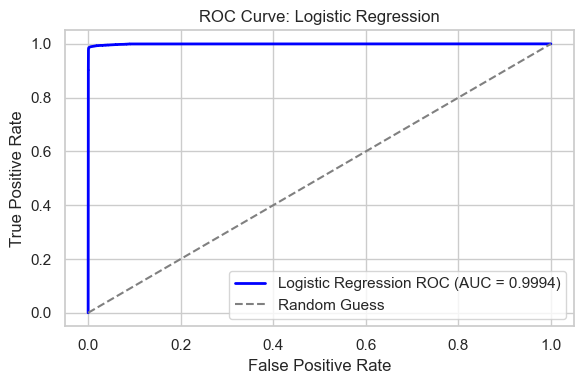


Evaluating Decision Tree:

Decision Tree Confusion Matrix:
                    Predicted: No Default  Predicted: Default
Actual: No Default                 222199                 239
Actual: Default                       327               46983
Decision Tree AUC Score: 0.9960


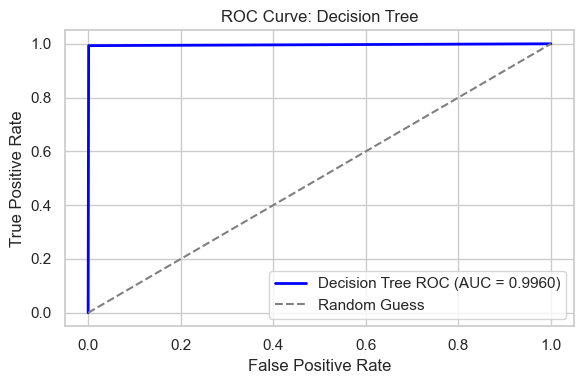


Evaluating Random Forest:

Random Forest Confusion Matrix:
                    Predicted: No Default  Predicted: Default
Actual: No Default                 222268                 170
Actual: Default                       110               47200
Random Forest AUC Score: 0.9996


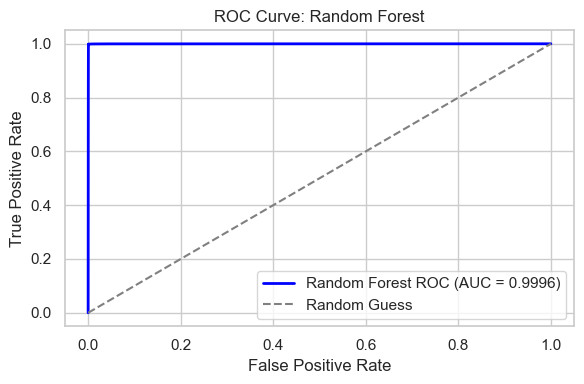


Evaluating K-Nearest Neighbors:

K-Nearest Neighbors Confusion Matrix:
                    Predicted: No Default  Predicted: Default
Actual: No Default                 221336                1102
Actual: Default                      1342               45968
K-Nearest Neighbors AUC Score: 0.9944


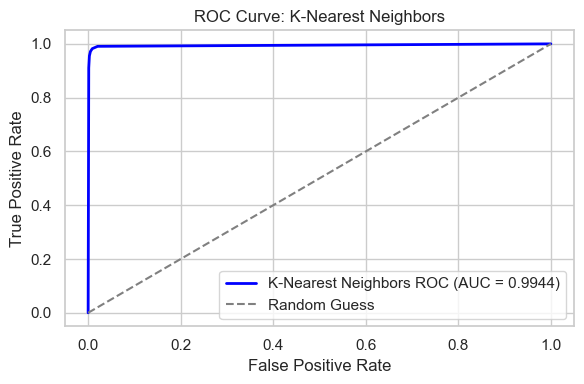


Model AUC Comparison:
Logistic Regression AUC: 0.9994
Decision Tree AUC: 0.9960
Random Forest AUC: 0.9996
K-Nearest Neighbors AUC: 0.9944


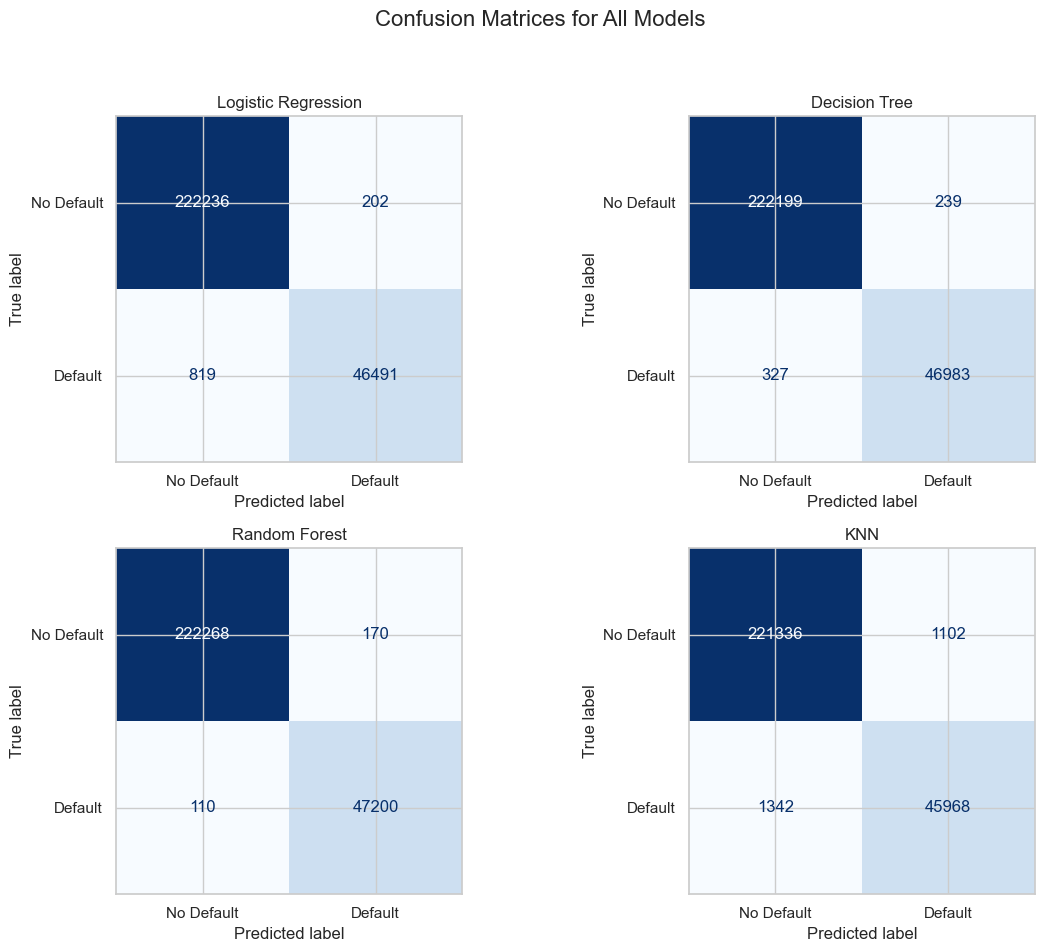


Based on the AUC scores and confusion matrices, you can compare models as follows:
1. Logistic Regression: AUC = 0.9994137887577238
2. Decision Tree: AUC = 0.996006788885481
3. Random Forest: AUC = 0.9996036205692719
4. K-Nearest Neighbors: AUC = 0.9943512140453534

Select the model with the highest AUC and consider explainability.
For example, if Random Forest has the highest AUC and provides robust performance with feature importance measures,
you might choose Random Forest as the best model for guiding lending decisions.


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

# -------------------------------
# Data Preparation
# -------------------------------

# Step 1: Load the cleaned dataset and display basic information
print("Step 1: Loading the dataset")
df = pd.read_csv("SBA_cleaned.csv")
print("Dataset loaded. Shape:", df.shape)
print("Dataset columns:", df.columns.tolist())

# Step 2: Convert the target column 'Default' to numeric (binary)
print("\nStep 2: Converting 'Default' column to numeric")
df['Default'] = df['Default'].astype(int)
print("Unique values in 'Default':", df['Default'].unique())

# Step 3: Select features by dropping identifiers and date columns
print("\nStep 3: Selecting features by dropping identifiers and date columns")
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status']
X = df.drop(columns=drop_cols + ['Default'], errors='ignore')
print("Feature matrix X shape:", X.shape)

# Step 4: One-hot encode categorical features in X
print("\nStep 4: Applying one-hot encoding to categorical features")
X = pd.get_dummies(X, drop_first=True)
print("Shape of X after encoding:", X.shape)

# Step 5: Set the target variable
y = df['Default']
print("\nStep 5: Target variable distribution (in %):")
dist_df = pd.DataFrame(y.value_counts(normalize=True) * 100)
dist_df.columns = ["Percentage"]
print(dist_df)

# Step 6: Scale the feature data using StandardScaler
print("\nStep 6: Scaling the feature data")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("First five rows of scaled features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

# -------------------------------
# Train-Test Split
# -------------------------------

print("\nStep 7: Splitting data into training and test sets (70% / 30%)")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)
print("Training set shape:", X_train.shape, "Test set shape:", X_test.shape)

# -------------------------------
# Model Evaluation Function
# -------------------------------

def evaluate_model(model, model_name):
    """
    Fit the model, predict on test set, display confusion matrix, plot ROC curve, and return AUC score.
    """
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, preds)
    print(f"\n{model_name} Confusion Matrix:")
    cm_df = pd.DataFrame(cm, 
                         index=["Actual: No Default", "Actual: Default"],
                         columns=["Predicted: No Default", "Predicted: Default"])
    print(cm_df)
    
    # Compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    print(f"{model_name} AUC Score: {auc_score:.4f}")
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} ROC (AUC = {auc_score:.4f})", color='blue', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return auc_score, cm

# -------------------------------
# Baseline: Logistic Regression
# -------------------------------

print("\nEvaluating Logistic Regression:")
lr_model = LogisticRegression(max_iter=2000)
lr_auc, lr_cm = evaluate_model(lr_model, "Logistic Regression")

# -------------------------------
# Model 1: Classification Tree (Decision Tree)
# -------------------------------

print("\nEvaluating Decision Tree:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_auc, dt_cm = evaluate_model(dt_model, "Decision Tree")

# -------------------------------
# Model 2: Random Forest
# -------------------------------

print("\nEvaluating Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_auc, rf_cm = evaluate_model(rf_model, "Random Forest")

# -------------------------------
# Model 3: K-Nearest Neighbors (KNN)
# -------------------------------

print("\nEvaluating K-Nearest Neighbors:")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_auc, knn_cm = evaluate_model(knn_model, "K-Nearest Neighbors")

# -------------------------------
# Compare AUC Scores
# -------------------------------
print("\nModel AUC Comparison:")
print(f"Logistic Regression AUC: {lr_auc:.4f}")
print(f"Decision Tree AUC: {dt_auc:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")
print(f"K-Nearest Neighbors AUC: {knn_auc:.4f}")

# -------------------------------
# Optional: Visualize Confusion Matrices for All Models in a Grid
# -------------------------------
models = {
    "Logistic Regression": lr_cm,
    "Decision Tree": dt_cm,
    "Random Forest": rf_cm,
    "KNN": knn_cm
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, models.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=["No Default", "Default"])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)

plt.suptitle("Confusion Matrices for All Models", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -------------------------------
# Model Selection
# -------------------------------
print("\nBased on the AUC scores and confusion matrices, you can compare models as follows:")
print("1. Logistic Regression: AUC =", lr_auc)
print("2. Decision Tree: AUC =", dt_auc)
print("3. Random Forest: AUC =", rf_auc)
print("4. K-Nearest Neighbors: AUC =", knn_auc)
print("\nSelect the model with the highest AUC and consider explainability.")
print("For example, if Random Forest has the highest AUC and provides robust performance with feature importance measures,")
print("you might choose Random Forest as the best model for guiding lending decisions.")


4 - Part 1: Principal Components Analysis (PCA)

Loading dataset...

Fitting PCA on training set...


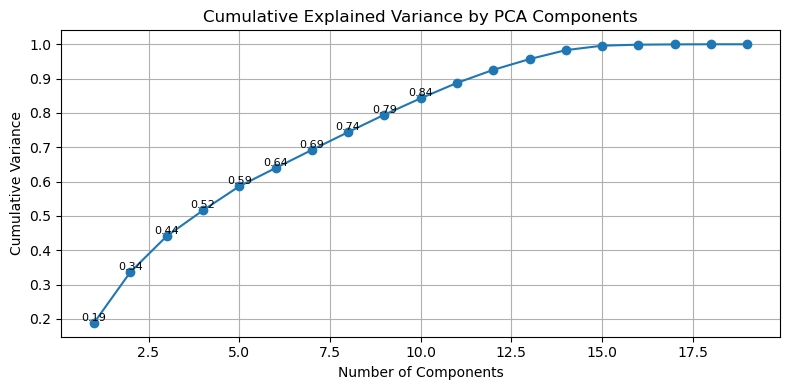

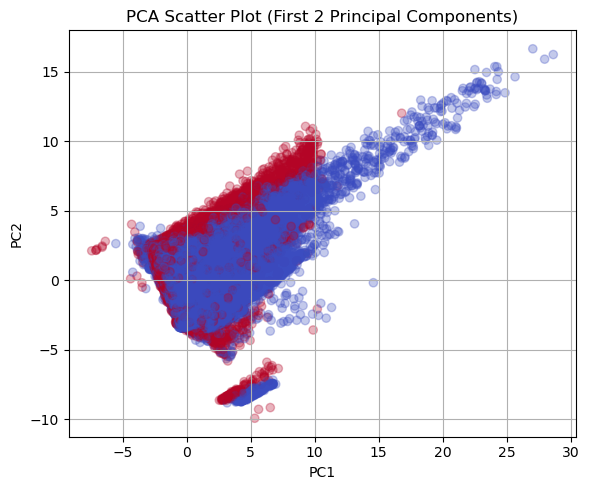


Explained variance by the first 5 principal components:
PC1: 0.1887
PC2: 0.1478
PC3: 0.1044
PC4: 0.0753
PC5: 0.0700


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------
# Step 1: Load and Prepare Data
# -------------------------------
print("Loading dataset...")
df = pd.read_csv("SBA_cleaned.csv")
df['Default'] = df['Default'].astype(int)

# Drop identifier/date/leaky columns
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status', 'Default']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Default']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# -------------------------------
# Step 2: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Step 3: Scale the Data
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Step 4: Apply PCA on Train Set
# -------------------------------
print("\nFitting PCA on training set...")
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# -------------------------------
# Step 5: Plot Cumulative Variance
# -------------------------------
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
for i, val in enumerate(cumulative_variance[:10]):
    plt.text(i + 1, val, str(round(val, 2)), fontsize=8, ha='center', va='bottom')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Step 6: 2D PCA Scatter Plot (Train Set)
# -------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.3)
plt.title("PCA Scatter Plot (First 2 Principal Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Step 7: Print Explained Variance
# -------------------------------
print("\nExplained variance by the first 5 principal components:")
for i, var in enumerate(pca.explained_variance_ratio_[:5], 1):
    print(f"PC{i}: {var:.4f}")

Loading cleaned dataset...

Evaluating K-Means for k = 2 to 6 on training set
k = 2, silhouette score = 0.2209
k = 3, silhouette score = 0.2272
k = 4, silhouette score = 0.2364
k = 5, silhouette score = 0.1941
k = 6, silhouette score = 0.1780

 Best k based on silhouette score: 4 (Score = 0.2364)


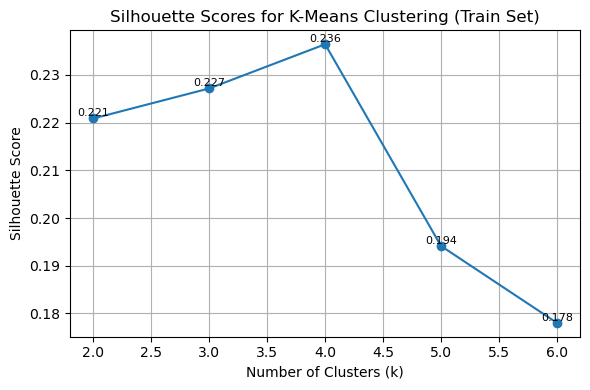

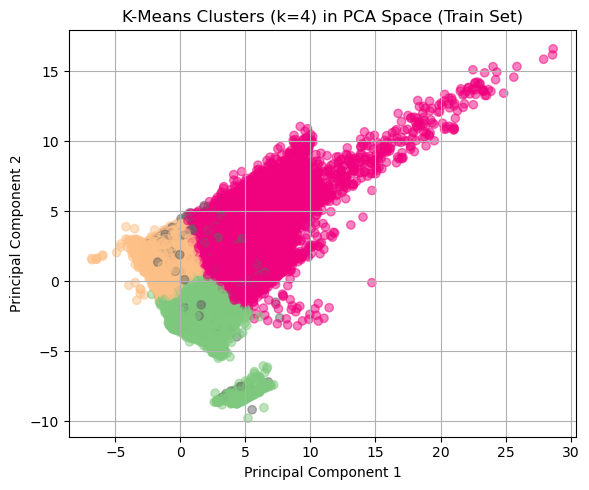


Cluster vs Default:
Actual Default       0      1
Cluster                      
0               177440  12398
1               267252  89499
2                56170   5268
3                17980   3403

Cluster Default Rates (proportions):
Actual Default      0      1
Cluster                     
0               0.935  0.065
1               0.749  0.251
2               0.914  0.086
3               0.841  0.159


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# -------------------------------
# Step 1: Load and Preprocess Data
# -------------------------------
print("Loading cleaned dataset...")
df = pd.read_csv("SBA_cleaned.csv")
df['Default'] = df['Default'].astype(int)

# Drop irrelevant or identifier columns
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status', 'Default']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Default']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split before PCA/KMeans
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (only for visualization)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# -----------------------------------
# Step 2: Evaluate K-Means Clustering
# -----------------------------------
print("\nEvaluating K-Means for k = 2 to 6 on training set")
sil_scores = []
labels_list = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    sil_scores.append(score)
    labels_list.append(labels)
    print(f"k = {k}, silhouette score = {score:.4f}")

# Find best k using highest silhouette score
best_idx = np.argmax(sil_scores)
best_k = K_range[best_idx]
print(f"\n Best k based on silhouette score: {best_k} (Score = {sil_scores[best_idx]:.4f})")

# Plot silhouette scores
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores, marker='o')
for i, score in enumerate(sil_scores):
    plt.text(K_range[i], score, str(round(score, 3)), ha='center', va='bottom', fontsize=8)
plt.title("Silhouette Scores for K-Means Clustering (Train Set)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show() 

# -----------------------------------
# Step 3: Final Clustering with Best k
# -----------------------------------
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
train_cluster_labels = kmeans_final.fit_predict(X_train_scaled)

# Plot clusters in PCA space
plt.figure(figsize=(6, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_cluster_labels, cmap='Accent', alpha=0.5)
plt.title(f"K-Means Clusters (k={best_k}) in PCA Space (Train Set)")
plt.xlabel("Principal Component 1") 
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------
# Step 4: Cluster vs Target Analysis
# -----------------------------------
print("\nCluster vs Default:")
cluster_table = pd.crosstab(train_cluster_labels, y_train, rownames=["Cluster"], colnames=["Actual Default"])
print(cluster_table)

print("\nCluster Default Rates (proportions):")
cluster_rate = cluster_table.div(cluster_table.sum(axis=1), axis=0).round(3)
print(cluster_rate)

Loading data...
Data prepared. Shape: (899158, 19)
Applying linkage (Ward's method)...


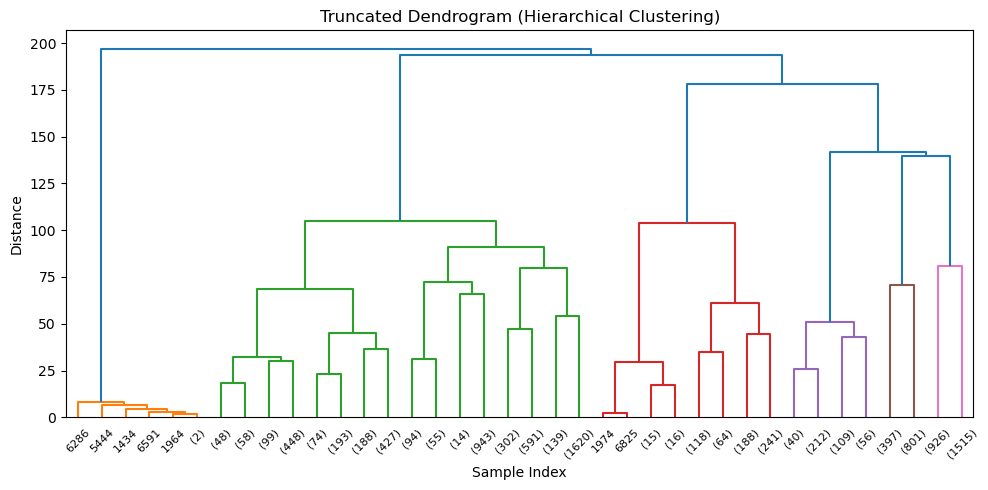

Forming flat clusters with t=2...

Cluster Sizes:
Cluster 1: 7 samples
Cluster 2: 9993 samples

Cluster vs Default:
Default     0     1
Cluster            
1           6     1
2        8255  1738

Cluster Default Rates (Proportions):
Default      0      1
Cluster              
1        0.857  0.143
2        0.826  0.174


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# ----------------------------------
# Step 1: Load and Prepare Data
# ----------------------------------
print("Loading data...")
df = pd.read_csv("SBA_cleaned.csv")
df['Default'] = df['Default'].astype(int)

# Drop non-feature columns
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status', 'Default']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Default']

# One-hot encode and scale
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data prepared. Shape:", X_scaled.shape)

# ---------------------------------------------
# Step 2: Sample 10,000 rows for performance
# ---------------------------------------------
np.random.seed(42)
sample_idx = np.random.choice(len(X_scaled), size=10000, replace=False)
X_sample = X_scaled[sample_idx]
y_sample = y.values[sample_idx]

# ---------------------------------------------
# Step 3: Apply Hierarchical Clustering (Ward)
# ---------------------------------------------
print("Applying linkage (Ward's method)...")
linkage_matrix = linkage(X_sample, method='ward')

# ---------------------------------------------
# Step 4: Plot Truncated Dendrogram
# ---------------------------------------------
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Truncated Dendrogram (Hierarchical Clustering)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Step 5: Form Flat Clusters (e.g., t=2)
# ---------------------------------------------
print("Forming flat clusters with t=2...")
flat_clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')

# ---------------------------------------------
# Step 6: Compare Clusters with 'Default'
# ---------------------------------------------
print("\nCluster Sizes:")
unique, counts = np.unique(flat_clusters, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} samples")

# Cross-tab with Default
print("\nCluster vs Default:")
cluster_vs_default = pd.crosstab(flat_clusters, y_sample, rownames=["Cluster"], colnames=["Default"])
print(cluster_vs_default)

# Optional: Show proportions
print("\nCluster Default Rates (Proportions):")
default_rate = cluster_vs_default.div(cluster_vs_default.sum(axis=1), axis=0).round(3)
print(default_rate)

Feature Important

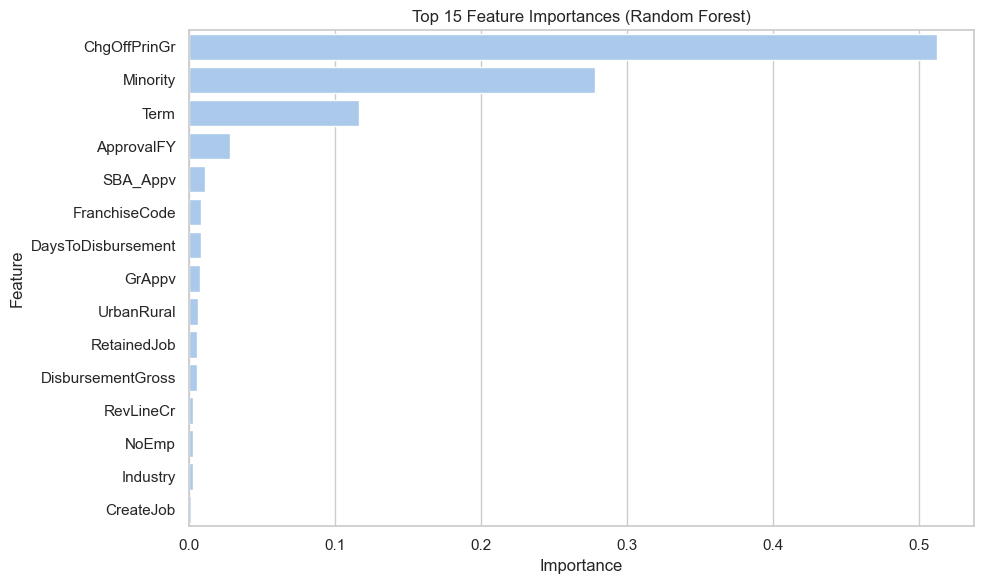

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('SBA_cleaned.csv')
df['Default'] = df['Default'].astype(int)

# Create 2-digit NAICS sector
df['NAICS_Sector'] = df['NAICS'].astype(str).str[:2]

# Drop unnecessary columns
drop_cols = ['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
             'ApprovalDate', 'DisbursementDate', 'ChgOffDate', 'MIS_Status', 'Default', 'NAICS']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['Default']

# One-hot encode categorical variables (including NAICS_Sector now)
X = pd.get_dummies(X, drop_first=True)

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()
